In [1]:
# colab - google drive mount
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [2]:
%cd "/content/gdrive/My Drive/kisti_colab/모두의 데이터분석 with python"
!ls -al

/content/gdrive/My Drive/kisti_colab/모두의 데이터분석 with python
total 2109
-rw------- 1 root root   19175 Dec 20 07:08 기온데이터.ipynb
-rw------- 1 root root  954586 Dec 20 10:11 모두의분석_my.ipynb
-rw------- 1 root root 1185149 Dec 11 02:19 seoul.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file_csv = pd.read_csv("seoul.csv",encoding='cp949')
file_csv.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [5]:
file_csv.tail()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
40216,2019-01-13,108,1.2,-3.0,7.6
40217,2019-01-14,108,1.4,-2.4,5.3
40218,2019-01-15,108,-1.7,-7.2,2.6
40219,2019-01-16,108,-5.2,-10.1,-1.1
40220,2019-01-17,108,-0.3,-3.2,4.0


In [0]:
data_Tamp = file_csv

In [7]:
data_Tamp.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


한글로 된 헤더가 불편하므로 영어로 바꾸도록 하자

In [0]:
data_Tamp['Date'] = data_Tamp['날짜']
data_Tamp['locate'] = data_Tamp['지점']
data_Tamp['max_tamp'] = data_Tamp['최고기온(℃)']
data_Tamp['min_tamp'] = data_Tamp['최저기온(℃)']
data_Tamp['mean_tamp'] = data_Tamp['평균기온(℃)']

In [9]:
data_Tamp.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),Date,locate,max_tamp,min_tamp,mean_tamp
0,1907-10-01,108,13.5,7.9,20.7,1907-10-01,108,20.7,7.9,13.5
1,1907-10-02,108,16.2,7.9,22.0,1907-10-02,108,22.0,7.9,16.2
2,1907-10-03,108,16.2,13.1,21.3,1907-10-03,108,21.3,13.1,16.2
3,1907-10-04,108,16.5,11.2,22.0,1907-10-04,108,22.0,11.2,16.5
4,1907-10-05,108,17.6,10.9,25.4,1907-10-05,108,25.4,10.9,17.6


제대로 추가 되었으니 앞의 한글 인덱스를 가진 데이터를 삭제

In [0]:
data_Tamp = data_Tamp.drop(['날짜','지점','평균기온(℃)','최저기온(℃)','최고기온(℃)'],axis=1)

데이터가 온전하게 로드된 것을 확인할 수 있다.
그럼 이제 결측치에 대해서 확인해보도록 하겠다.

## 데이터가 빈 곳이 있는지를 먼저 확인해 보도록 하자

In [11]:
data_Tamp.count()

Date         40221
locate       40221
max_tamp     39463
min_tamp     39464
mean_tamp    39465
dtype: int64

갯수를 보면 평균기온과 최저기온 최고기온 모두에서 누락된 값이 나타나는 것을 볼 수 있다.

In [12]:
data_Tamp[data_Tamp['max_tamp'].isna()].count()

Date         758
locate       758
max_tamp       0
min_tamp       1
mean_tamp      2
dtype: int64

가장 숫자가 적은 최고기온을 기준으로 누락된 값의 갯수를 확인해보면 날짜에 비해서는 758개가, <br>평균과 최저에 비해서는 1개에서 2개정도 더 누락되있는 상태를 볼 수 있다.<br>
하지만 이를 측정하거나 참고할 수 있는 자료가 따로 없기때문에 기온 변화에 따른 결측치를 각 기온의 평균값으로 채워넣어주도록 할 예정이다.

In [0]:
data_Tamp['max_tamp'].fillna(round(data_Tamp['max_tamp'].mean(),ndigits=1),inplace=True)
data_Tamp['mean_tamp'].fillna(round(data_Tamp['mean_tamp'].mean(),ndigits=1),inplace=True)
data_Tamp['min_tamp'].fillna(round(data_Tamp['min_tamp'].mean(),ndigits=1),inplace=True)

In [14]:
data_Tamp[data_Tamp['max_tamp'].isna()].count()

Date         0
locate       0
max_tamp     0
min_tamp     0
mean_tamp    0
dtype: int64

In [15]:
data_Tamp.count()

Date         40221
locate       40221
max_tamp     40221
min_tamp     40221
mean_tamp    40221
dtype: int64

모든 데이터의 결측치를 제거 한 상태임을 확인할 수 있다.

# 최고기온을 알아보자

In [16]:
max_tamp = max(data_Tamp['max_tamp'])
max_date = data_Tamp['Date'][data_Tamp['max_tamp']==max_tamp]
print(max_date,'   ',max_tamp)

40051    2018-08-01
Name: Date, dtype: object     39.6


이처럼 2018-08-01 에 39.6도가 가장 높은 기온인 것을 확인하였다.

# 기온데이터를 시각화 해보도록 하자

일단 데이터를 float 타입으로 변환시킨다.

In [0]:
data_Tamp['max_tamp'] = data_Tamp['max_tamp'].astype('float64')
data_Tamp['min_tamp'] = data_Tamp['min_tamp'].astype('float64')
data_Tamp['mean_tamp'] = data_Tamp['mean_tamp'].astype('float64')

In [0]:
max_tamp_list = list(data_Tamp['max_tamp'])
min_tamp_list = list(data_Tamp['min_tamp'])
mean_tamp_list = list(data_Tamp['mean_tamp'])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


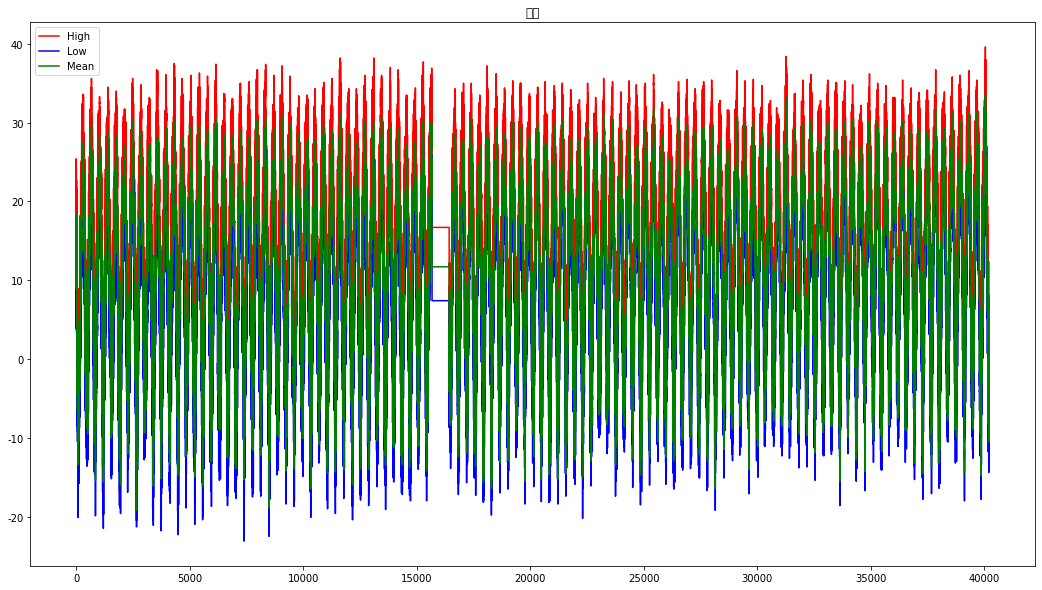

In [32]:
plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(18,10))
plt.title('기온')
plt.plot(max_tamp_list,'R',label = 'High')
plt.plot(min_tamp_list,'B',label='Low')
plt.plot(mean_tamp_list,'G',label='Mean')
plt.legend()
plt.show()

와 같이 너무 많은 데이터가 존재하여 그래프를 알아볼 수가 없다.
그러므로 특정 날짜의 데이터만 추려서 보도록 하자

# 생일의 날씨만을 활용하여 그래프 그리기

In [20]:
split_day = list(data_Tamp['Date'])
for i,x in enumerate(split_day):
  split_day[i] = x.split('-')
print(split_day)

[['1907', '10', '01'], ['1907', '10', '02'], ['1907', '10', '03'], ['1907', '10', '04'], ['1907', '10', '05'], ['1907', '10', '06'], ['1907', '10', '07'], ['1907', '10', '08'], ['1907', '10', '09'], ['1907', '10', '10'], ['1907', '10', '11'], ['1907', '10', '12'], ['1907', '10', '13'], ['1907', '10', '14'], ['1907', '10', '15'], ['1907', '10', '16'], ['1907', '10', '17'], ['1907', '10', '18'], ['1907', '10', '19'], ['1907', '10', '20'], ['1907', '10', '21'], ['1907', '10', '22'], ['1907', '10', '23'], ['1907', '10', '24'], ['1907', '10', '25'], ['1907', '10', '26'], ['1907', '10', '27'], ['1907', '10', '28'], ['1907', '10', '29'], ['1907', '10', '30'], ['1907', '10', '31'], ['1907', '11', '01'], ['1907', '11', '02'], ['1907', '11', '03'], ['1907', '11', '04'], ['1907', '11', '05'], ['1907', '11', '06'], ['1907', '11', '07'], ['1907', '11', '08'], ['1907', '11', '09'], ['1907', '11', '10'], ['1907', '11', '11'], ['1907', '11', '12'], ['1907', '11', '13'], ['1907', '11', '14'], ['1907', 

분리된 날짜를 연도끼리, 달끼리, 날끼리 묶어주는 작업을 하자

In [43]:
year = []
month = []
day = []
for x in split_day:
  year.append(x[0])
  month.append(x[1])
  day.append(x[2])
print(year)
print(month)
print(day)

['1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908',

날짜를 분리하여 각각의 컬럼으로 만들어 두었다.

In [0]:
data_Tamp['year'] = year
data_Tamp['month'] = month
data_Tamp['day'] = day

In [23]:
data_Tamp.head()

,Date,locate,max_tamp,min_tamp,mean_tamp,year,month,day
0,1907-10-01,108,20.7,7.9,13.5,1907,10,01
1,1907-10-02,108,22.0,7.9,16.2,1907,10,02
2,1907-10-03,108,21.3,13.1,16.2,1907,10,03
3,1907-10-04,108,22.0,11.2,16.5,1907,10,04
4,1907-10-05,108,25.4,10.9,17.6,1907,10,05


분리된 날짜를 이용하여 생일인 날의 데이터만 읽어와 보도록 하자

In [26]:
 data_Tamp[(data_Tamp['month'] == '12') & (data_Tamp['day'] == '29')].count()

Date         111
locate       111
max_tamp     111
min_tamp     111
mean_tamp    111
year         111
month        111
day          111
dtype: int64

총 111개의 데이터로 앞서 사용했던 전체 데이터에 비해 확실하게 줄어든 모습을 볼 수 있다.

In [0]:
BD_max_T = list(data_Tamp[(data_Tamp['month'] == '12') & (data_Tamp['day'] == '29')]['max_tamp'])
BD_min_T = list(data_Tamp[(data_Tamp['month'] == '12') & (data_Tamp['day'] == '29')]['min_tamp'])
BD_mean_T = list(data_Tamp[(data_Tamp['month'] == '12') & (data_Tamp['day'] == '29')]['mean_tamp'])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_te

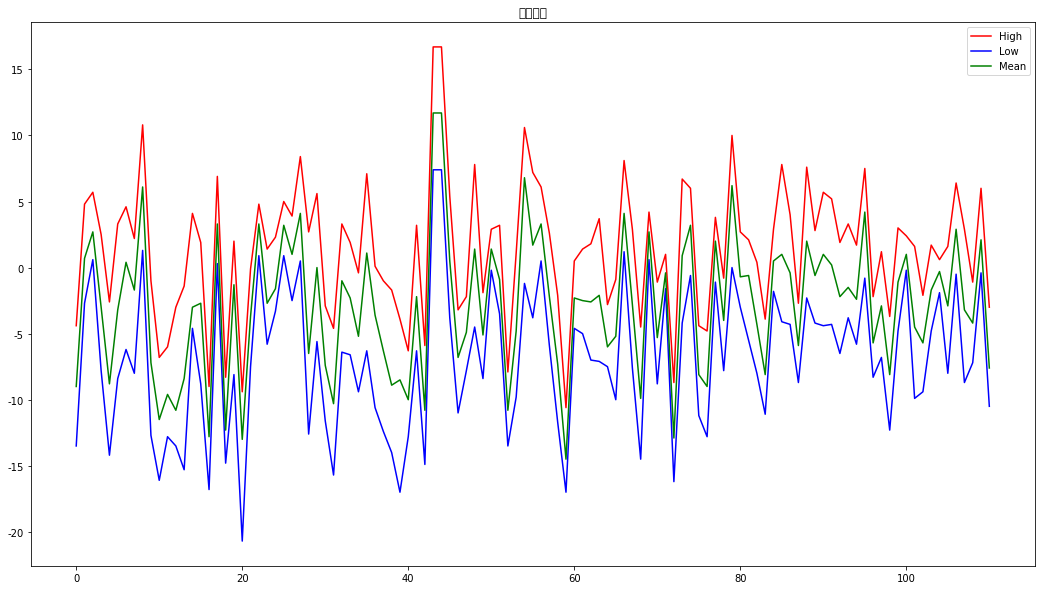

In [31]:
plt.rc('font',family = 'Malgun Gothic')
plt.figure(figsize=(18,10))
plt.rcParams['axes.unicode_minus'] = False
plt.title('생일기온')
plt.plot(BD_max_T,'R',label = 'High')
plt.plot(BD_min_T,'B',label='Low')
plt.plot(BD_mean_T,'G',label='Mean')
plt.legend()
plt.show()

# 히스토그램으로 살펴보도록 하자

In [0]:
hist_High = list(data_Tamp['max_tamp'])
hist_Low = list(data_Tamp['min_tamp'])

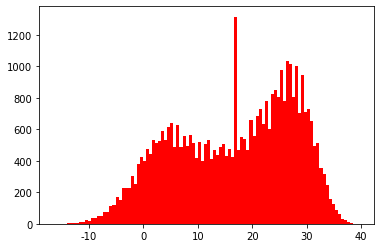

In [34]:
plt.hist(hist_High,bins=100,color='r')
plt.show()

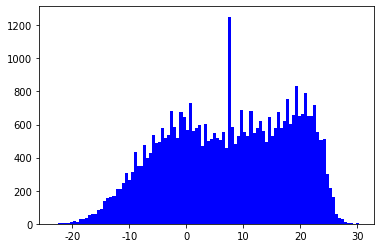

In [35]:
plt.hist(hist_Low,bins=100,color='b')
plt.show()

가운데 우뚝 솟은 차트는 평균으로 처리하면서 생긴 결과인것처럼 보인다.<br>
따라서 처리에 있어서 수치를 영향이 없을만한 outlier로 처리해버리는 방안도 고려해볼만 한 방법이라고 생각된다.

## 8월의 데이터만 뽑아서 정리해보도록 하자

In [45]:
data_Tamp[data_Tamp['month']=='08']['max_tamp']

305      29.6
306      30.7
307      32.0
308      31.5
309      32.4
         ... 
40077    24.9
40078    26.1
40079    27.4
40080    28.2
40081    30.3
Name: max_tamp, Length: 3379, dtype: float64

In [0]:
hist_High_Au = list(data_Tamp[data_Tamp['month']=='08']['max_tamp'])
hist_Low_Au = list(data_Tamp[data_Tamp['month']=='08']['min_tamp'])
hist_High_Ja = list(data_Tamp[data_Tamp['month']=='01']['max_tamp'])
hist_Low_Ja = list(data_Tamp[data_Tamp['month']=='01']['min_tamp'])

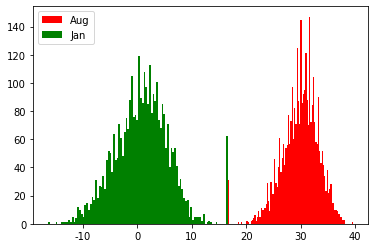

In [49]:
plt.hist(hist_High_Au,bins=100,color='R',label='Aug')
plt.hist(hist_High_Ja,bins=100,color='G',label='Jan')
plt.legend()
plt.show()

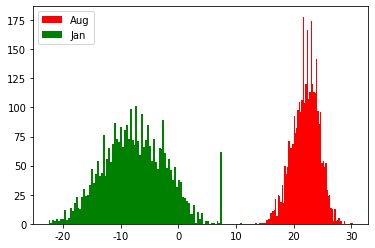

In [52]:
plt.hist(hist_Low_Au,bins=100,color='R',label='Aug')
plt.hist(hist_Low_Ja,bins=100,color='G',label='Jan')
plt.legend()
plt.show()

위의 두 그래프를 비교해보면 <br>여름인 8월은 최저와 최고를 합한 전체적인 기온이 10도~40도 정도로 분포하고 있다는 것을 알 수 있고<br>
겨울인 1월은 -20도에서 10도 정도의 분포를 가진다는 것을 알 수 있습니다.

# 상자그림으로 데이터 확인하기

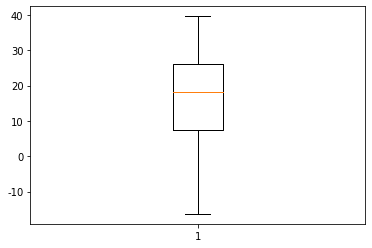

In [53]:
plt.boxplot(max_tamp_list)
plt.show()

이처럼 4분위수의 분포를 보기 편하게 나타내어 준다<br>
다음으로 1월과 8월의 데이터를 박스그래프로 나타내어 보도록 하겠다

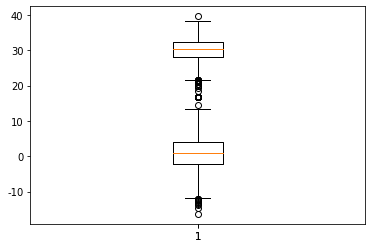

In [54]:
plt.boxplot(hist_High_Au)
plt.boxplot(hist_High_Ja)
plt.show()

한번에 그리기

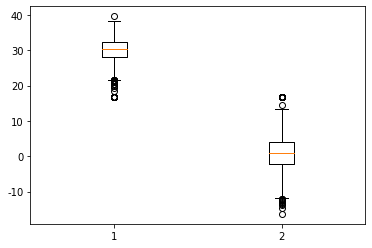

In [55]:
plt.boxplot([hist_High_Au,hist_High_Ja])
plt.show()

In [0]:
High_Ja = list(data_Tamp[data_Tamp['month']=='01']['max_tamp'])
Low_Ja = list(data_Tamp[data_Tamp['month']=='01']['min_tamp'])
High_Fe = list(data_Tamp[data_Tamp['month']=='02']['max_tamp'])
Low_Fe = list(data_Tamp[data_Tamp['month']=='02']['min_tamp'])
High_Ma = list(data_Tamp[data_Tamp['month']=='03']['max_tamp'])
Low_Ma = list(data_Tamp[data_Tamp['month']=='03']['min_tamp'])
High_Ap = list(data_Tamp[data_Tamp['month']=='04']['max_tamp'])
Low_Ap = list(data_Tamp[data_Tamp['month']=='04']['min_tamp'])
High_May = list(data_Tamp[data_Tamp['month']=='05']['max_tamp'])
Low_May = list(data_Tamp[data_Tamp['month']=='05']['min_tamp'])
High_Ju = list(data_Tamp[data_Tamp['month']=='06']['max_tamp'])
Low_Ju = list(data_Tamp[data_Tamp['month']=='06']['min_tamp'])
High_Jul = list(data_Tamp[data_Tamp['month']=='07']['max_tamp'])
Low_Jul = list(data_Tamp[data_Tamp['month']=='07']['min_tamp'])
High_Au = list(data_Tamp[data_Tamp['month']=='08']['max_tamp'])
Low_Au = list(data_Tamp[data_Tamp['month']=='08']['min_tamp'])
High_Sep = list(data_Tamp[data_Tamp['month']=='09']['max_tamp'])
Low_Sep = list(data_Tamp[data_Tamp['month']=='09']['min_tamp'])
High_Oct = list(data_Tamp[data_Tamp['month']=='10']['max_tamp'])
Low_Oct = list(data_Tamp[data_Tamp['month']=='10']['min_tamp'])
High_No = list(data_Tamp[data_Tamp['month']=='11']['max_tamp'])
Low_No = list(data_Tamp[data_Tamp['month']=='11']['min_tamp'])
High_De = list(data_Tamp[data_Tamp['month']=='12']['max_tamp'])
Low_De = list(data_Tamp[data_Tamp['month']=='12']['min_tamp'])

각 월별로 데이터를 나눔

In [0]:
month_High = [High_Ja,High_Fe,High_Ma,High_Ap,High_May,High_Ju,High_Jul,High_Au,High_Sep,High_Oct,High_No,High_De]
month_Low = [Low_Ja,Low_Fe,Low_Ma,Low_Ap,Low_May,Low_Ju,Low_Jul,Low_Au,Low_Sep,Low_Oct,Low_No,Low_De]

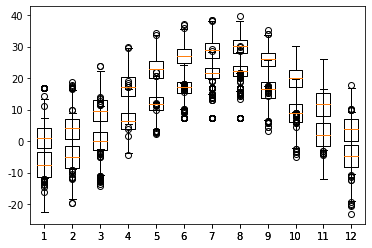

In [59]:
plt.boxplot(month_High)
plt.boxplot(month_Low)
plt.show()

전체적인 박스플롯을 사용하면 박스플롯의 모양이 히스토그램의 모양의 따라 움직이는 것을 볼 수 있다.<br>
그러면 이제 월별을 살펴보았으니 일별로 살펴보도록 하자

In [65]:
# 8월의 데이터를 일별로 뽑아내면
Tamp_Aug = data_Tamp[data_Tamp['month']=='08']
Tamp_Aug.head()

,Date,locate,max_tamp,min_tamp,mean_tamp,year,month,day
305,1908-08-01,108,29.6,24.4,26.2,1908,08,01
306,1908-08-02,108,30.7,23.3,26.4,1908,08,02
307,1908-08-03,108,32.0,24.2,26.9,1908,08,03
308,1908-08-04,108,31.5,22.6,26.3,1908,08,04
309,1908-08-05,108,32.4,23.6,27.3,1908,08,05


In [0]:
Day_High_Aug = [[]]*31

In [0]:
for i in range(1,32):
  if i < 10:
    Day_High_Aug[i-1]=(Tamp_Aug[Tamp_Aug['day']=='0'+str(i)]['max_tamp'])
  else:
    Day_High_Aug[i-1]=(Tamp_Aug[Tamp_Aug['day']==str(i)]['max_tamp'])

In [82]:
Day_High_Aug[0]

305      29.6
670      32.3
1035     32.0
1400     31.0
1766     31.5
         ... 
38590    34.7
38955    31.6
39321    32.4
39686    33.0
40051    39.6
Name: max_tamp, Length: 109, dtype: float64

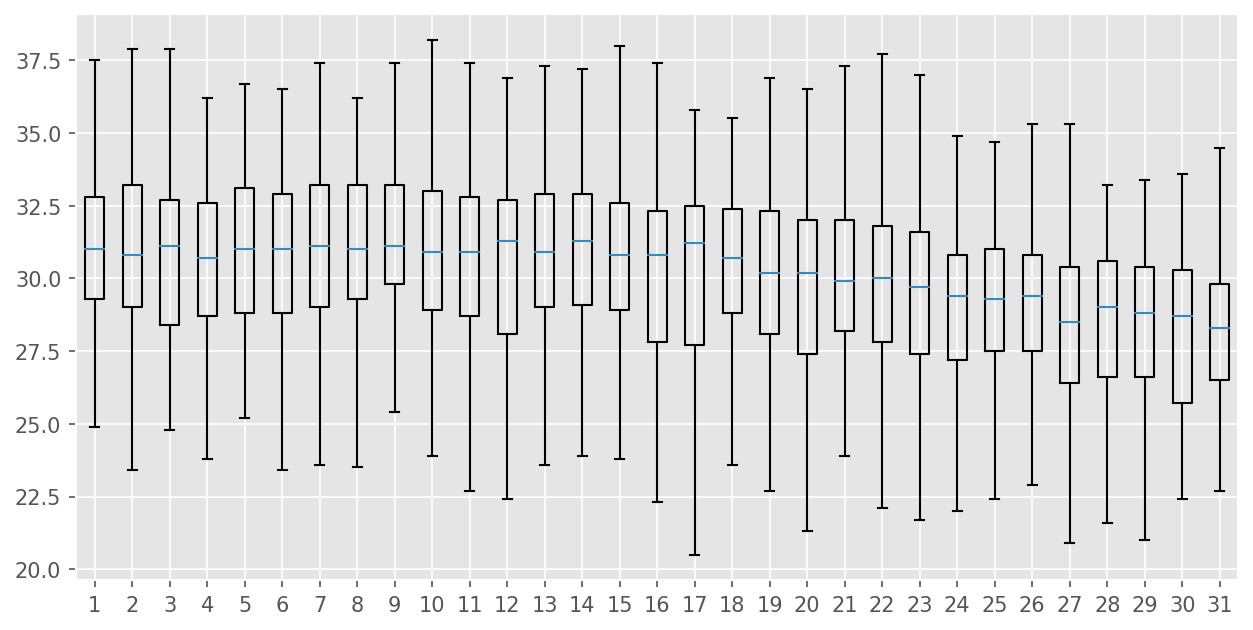

In [86]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5),dpi=150)
plt.boxplot(Day_High_Aug,showfliers=False)
plt.show()